In [2]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.32
    Uninstalling langchain-core-0.3.32:
      Successfully uninstalled langchain-core-0.3.32


In [3]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.5 MB/s eta 0:00:00


In [4]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt.tool_validator import ValidationNode


In [5]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.5 MB/s eta 0:00:00


In [6]:
from langchain.chat_models import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode


In [7]:
!apt-get install graphviz graphviz-dev # Install Graphviz using apt
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 18 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [8]:
!pip install --upgrade langgraph



# Iteration 3

In [9]:

import pandas as pd

# Define the Imagenow Tool
@tool
def imagenow_tool(invoice_id: str):
    """Check payment status in Imagenow."""

    # Load the Imagenow dataset
    imagenow_file_path = "/content/image_now_modified.xlsx"  # Replace with actual file path
    imagenow_df = pd.read_excel(imagenow_file_path)

    # Find the corresponding row based on the invoice_id
    invoice_data = imagenow_df[imagenow_df["Invoice Number"] == invoice_id]

    # If the invoice is found, return the status
    if not invoice_data.empty:
        payment_status = invoice_data.iloc[0]["Status"]
        return {
            "status": payment_status
        }
    else:
        return {"error": f"Invoice {invoice_id} not found."}

# Define the Lawson Tool
@tool
def lawson_tool(invoice_id: str):
    """Fetch payment details from Lawson based on the invoice ID."""

    # Load the Lawson dataset
    lawson_file_path = "/content/lawson_modified.xlsx"  # Replace with actual file path
    lawson_df = pd.read_excel(lawson_file_path)

    # Find the corresponding row based on the invoice_id
    invoice_data = lawson_df[lawson_df["Invoice ID"] == invoice_id]

    # If the invoice is found, return the relevant payment details
    if not invoice_data.empty:
        payment_method = invoice_data.iloc[0]["Payment Method"]
        payment_date = invoice_data.iloc[0]["Payment Date"]
        exception_status = invoice_data.iloc[0]["Exception Status"]
        return {
            "payment_method": payment_method,
            "payment_date": payment_date,
            "exception_status": exception_status,
        }
    else:
        return {"error": f"Invoice {invoice_id} not found."}

# Define the Ivalua Tool
@tool
def ivalua_tool(invoice_id: str):
    """Check transmission status in Ivalua based on the invoice ID."""

    # Load the Ivalua dataset
    ivalua_file_path = "/content/ivalua_dataset.xlsx"  # Replace with the actual file path
    ivalua_df = pd.read_excel(ivalua_file_path)

    # Lookup the transmission and exception status for the given invoice
    invoice_row = ivalua_df[ivalua_df["Invoice Number"] == invoice_id]

    # If the invoice is found, return transmission and exception status
    if not invoice_row.empty:
        transmission_status = invoice_row.iloc[0]["Transmission Status"]
        exception_status = invoice_row.iloc[0]["Exception status"]
        return {
            "transmission_status": transmission_status,
            "exception_status": exception_status
        }
    else:
        return {"error": f"Invoice {invoice_id} not found in Ivalua."}

# Define the Email Tool
@tool
def email_tool(recipient: str, message: str):
    """Send an email to the vendor or team."""
    return {"email_status": "Sent"}

# List of tools
tools = [imagenow_tool, lawson_tool, ivalua_tool, email_tool]

# Initialize the LLM and bind the tools



In [17]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    """The state of the agent."""
    messages: Annotated[Sequence[BaseMessage], add_messages]  # Reducer for messages

In [11]:
import json
from langchain_core.messages import ToolMessage

# Create a mapping of tools by name
tools_by_name = {tool.name: tool for tool in tools}

# Tool node for processing tool calls
def tool_node(state: AgentState):
    outputs = []
    for tool_call in state["messages"][-1].tool_calls:
        tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])
        outputs.append(
            ToolMessage(
                content=json.dumps(tool_result),
                name=tool_call["name"],
                tool_call_id=tool_call["id"],
            )
        )
    return {"messages": outputs}

In [12]:
import json
from langchain_core.messages import ToolMessage

# Create a mapping of tools by name
tools_by_name = {tool.name: tool for tool in tools}
def tool_node(state: AgentState):
    outputs = []
    for tool_call in state["messages"][-1].tool_calls:
        tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])

        # Convert Timestamp objects to strings before serialization
        for key, value in tool_result.items():
            if isinstance(value, pd.Timestamp):
                tool_result[key] = value.isoformat()  # Convert to ISO format string

        outputs.append(
            ToolMessage(
                content=json.dumps(tool_result),
                name=tool_call["name"],
                tool_call_id=tool_call["id"],
            )
        )
    return {"messages": outputs}

In [13]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage
from langchain_core.runnables import RunnableConfig

# Define the workflow steps
steps_prompt = """
You are an AI orchestrator for the Payment Inquiry workflow. Follow these steps to process the query:

1. Check the payment status in Imagenow using the invoice ID.
2. If the status is "Paid":
   - Fetch payment details (method and date) from Lawson.
   - Respond to the vendor with the payment details.
   - Update the notes in Imagenow.
3. If the status is "Not Paid":
   - Determine whether the PO is a 10-digit or 11-digit number.
   - For an 11-digit PO:
       - Check transmission status in Ivalua.
       - If not transmitted, notify the appropriate person and update the notes.
       - If transmitted, check exception status in Lawson.
   - For a 10-digit PO:
       - Check exception status in Lawson.
       - Notify the appropriate person based on the exception status.
4. At each step, use the appropriate tool and reason about the next action based on the tool's result.
"""

# Initialize the LLM and bind tools
model1 = ChatOpenAI(model="gpt-4", temperature=0).bind_tools(tools)

# Define the LLM node
def call_model(state: AgentState, config: RunnableConfig):
    # Combine the steps prompt with the original system message
    system_prompt = SystemMessage(
        content=f"{steps_prompt}\n\nYou are a workflow orchestrator for Payment Inquiry. Decide which tool to use or provide a final answer based on the query."
    )
    response = model1.invoke([system_prompt] + state["messages"], config)
    return {"messages": [response]}

In [14]:
def should_continue(state: AgentState):
    messages = state["messages"]
    last_message = messages[-1]

    # Continue if there are pending tool calls
    if last_message.tool_calls:
        return "tools"
    return "end"

In [15]:
# ipython-input-48-22d05b2e512c
from langgraph.graph import StateGraph, END

# Initialize the StateGraph
workflow = StateGraph(AgentState)

# Add nodes
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

# Set entry point
workflow.set_entry_point("agent")

# Add conditional edges, use 'tools' instead of 'continue'
workflow.add_conditional_edges("agent", should_continue, {"tools": "tools", "end": END})

# Add edge from tools back to agent
workflow.add_edge("tools", "agent")
# Compile the workflow
graph1 = workflow.compile()

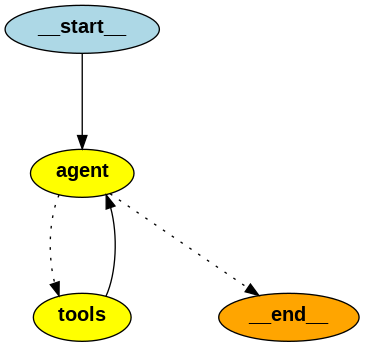

In [ ]:
from IPython.display import Image

# Assuming `graph.get_graph()` provides a graph object and `.draw_png()` generates a PNG image
# Visualize the graph in a Jupyter notebook
Image(app.get_graph().draw_png())

In [16]:
import time

# Helper function for formatting the output stream
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

# Define user query
inputs = {"messages": [("user", "Check the payment status of invoice INV-0003.PO number is 77649657916")]}

# Start timing the execution
start_time = time.time()

# Execute the workflow and print the output stream
print_stream(graph1.stream(inputs, stream_mode="values"))

# End timing and calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

# Print the execution time
print(f"Execution Time: {execution_time} seconds")


================================ Human Message =================================

Check the payment status of invoice INV-0003.PO number is 77649657916
================================== Ai Message ==================================
Tool Calls:
  imagenow_tool (call_YB0UA9xMtAYzeuXTQREeQTs8)
 Call ID: call_YB0UA9xMtAYzeuXTQREeQTs8
  Args:
    invoice_id: INV-0003
================================= Tool Message =================================
Name: imagenow_tool

{"status": "Not Paid"}
================================== Ai Message ==================================

The PO number is an 11-digit number. Let's check the transmission status in Ivalua.
Tool Calls:
  ivalua_tool (call_6BbC8cwZURkCBhe1JwJuoc0d)
 Call ID: call_6BbC8cwZURkCBhe1JwJuoc0d
  Args:
    invoice_id: INV-0003
================================= Tool Message =================================
Name: ivalua_tool

{"transmission_status": "Not Transmitted", "exception_status": "MA126"}
================================== Ai Me

In [ ]:
# Helper function for formatting the output stream
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

# Define user query
inputs = {"messages": [("user", "Check the payment status of invoice INV-0002.PO number is 8752760620")]}

# Execute the workflow
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Check the payment status of invoice INV-0002.PO number is 8752760620
================================== Ai Message ==================================
Tool Calls:
  imagenow_tool (call_PFpBqUbcAl47eXXWKdQyRkzm)
 Call ID: call_PFpBqUbcAl47eXXWKdQyRkzm
  Args:
    invoice_id: INV-0002
================================= Tool Message =================================
Name: imagenow_tool

{"status": "Not Paid"}
================================== Ai Message ==================================

The PO number is a 10-digit number. Let's check the exception status in Lawson.
Tool Calls:
  lawson_tool (call_dfujxYyCRICfQYsxuvWlGLcv)
 Call ID: call_dfujxYyCRICfQYsxuvWlGLcv
  Args:
    invoice_id: INV-0002
================================= Tool Message =================================
Name: lawson_tool

{"payment_method": "Check", "payment_date": "2019-05-01T00:00:00", "exception_status": "AP90"}
======================

In [ ]:
# Helper function for formatting the output stream
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

# Define user query
inputs = {"messages": [("user", "Check the payment status of invoice INV-0016.PO number is 21185544688")]}

# Execute the workflow
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Check the payment status of invoice INV-0016.PO number is 21185544688
================================== Ai Message ==================================
Tool Calls:
  imagenow_tool (call_ctswNNlbyOxS33SNvyfT1uL8)
 Call ID: call_ctswNNlbyOxS33SNvyfT1uL8
  Args:
    invoice_id: INV-0016
================================= Tool Message =================================
Name: imagenow_tool

{"status": "Not Paid"}
================================== Ai Message ==================================

The PO number is an 11-digit number. Let's check the transmission status in Ivalua.
Tool Calls:
  ivalua_tool (call_bDguK7xSZNU6MPOeCYi65Bto)
 Call ID: call_bDguK7xSZNU6MPOeCYi65Bto
  Args:
    invoice_id: INV-0016
================================= Tool Message =================================
Name: ivalua_tool

{"transmission_status": "Not Transmitted", "exception_status": "MA126"}
================================== Ai Me

In [ ]:
# Helper function for formatting the output stream
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

# Define user query
inputs = {"messages": [("user", "Check the payment status of invoice INV-0001.PO number is 47687632524")]}

# Execute the workflow
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Check the payment status of invoice INV-0001.PO number is 47687632524
================================== Ai Message ==================================
Tool Calls:
  imagenow_tool (call_v6I9gIAoED7cK0eHyVLCO7XQ)
 Call ID: call_v6I9gIAoED7cK0eHyVLCO7XQ
  Args:
    invoice_id: INV-0001
================================= Tool Message =================================
Name: imagenow_tool

{"status": "Paid"}
================================== Ai Message ==================================
Tool Calls:
  lawson_tool (call_bzuD4ALpP4osaXeQysy81uBc)
 Call ID: call_bzuD4ALpP4osaXeQysy81uBc
  Args:
    invoice_id: INV-0001
================================= Tool Message =================================
Name: lawson_tool

{"payment_method": "check", "payment_date": "2020-01-12T00:00:00", "exception_status": NaN}
================================== Ai Message ==================================
Tool Calls:
  email_tool (ca

### **SUBGRAPH 2 (PO INVOICE FOR PROCESSING)**


In [18]:
import pandas as pd
from langchain_openai import ChatOpenAI
from langchain_core.messages import ToolMessage
from langchain_core.messages import BaseMessage
from langchain_core.runnables import RunnableConfig
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages
from langchain_core.messages import SystemMessage
from typing import Annotated, Sequence, TypedDict

In [19]:
# Define the tools for Subgraph 2 (PO Invoice Processing)

@tool
def imagenow_tool_subgraph2(invoice_id: str):
    """Check if invoice is present in Imagenow for Subgraph 2."""

    # Load the Imagenow dataset
    imagenow_file_path = "/content/image_now_modified.xlsx"  # Replace with actual file path
    imagenow_df = pd.read_excel(imagenow_file_path)

    # Find the corresponding row based on the invoice_id
    invoice_data = imagenow_df[imagenow_df["Invoice Number"] == invoice_id]

    # If the invoice is found, return the status
    if not invoice_data.empty:
        queue = invoice_data.iloc[0]["Queue"]
        return {
            "status": "Present",
            "queue": queue
        }
    else:
        return {"status": "Not Present"}

# Define the Email Tool for Subgraph 2
@tool
def email_tool_subgraph2(recipient: str, message: str):
    """Send an email to the vendor or team for Subgraph 2."""
    print(f"Email forwarded to {recipient}: {message}")
    return {"email_status": "Sent"}

# List of tools for Subgraph 2
tools_subgraph2 = [imagenow_tool_subgraph2, email_tool_subgraph2]

In [21]:
# Initialize the LLM and bind tools for Subgraph 2
class AgentState_subgraph2(TypedDict):
    """The state of the agent for Subgraph 2."""
    messages: Annotated[Sequence[BaseMessage], add_messages]  # Reducer for messages

tools_by_name_subgraph2 = {tool.name: tool for tool in tools_subgraph2}

In [22]:
# Tool node for processing tool calls in Subgraph 2
def tool_node_subgraph2(state: AgentState_subgraph2):
    outputs = []
    for tool_call in state["messages"][-1].tool_calls:
        tool_result = tools_by_name_subgraph2[tool_call["name"]].invoke(tool_call["args"])

        # Convert Timestamp objects to strings before serialization
        for key, value in tool_result.items():
            if isinstance(value, pd.Timestamp):
                tool_result[key] = value.isoformat()  # Convert to ISO format string

        outputs.append(
            ToolMessage(
                content=json.dumps(tool_result),
                name=tool_call["name"],
                tool_call_id=tool_call["id"],
            )
        )
    return {"messages": outputs}

In [23]:
# Define the workflow steps (steps prompt for PO Invoice in Subgraph 2)
steps_prompt_subgraph2 = """
You are an AI orchestrator for the PO Invoice Processing workflow. Follow these steps to process the query:

1. Check if the invoice is present in Imagenow using the invoice ID.
2. If the invoice is not present:
   - Forward the email to the invoice processing team.
3. If the invoice is present:
   - Check in which queue it is located.
   - Create a response based on the queue.
4. At each step, use the appropriate tool and reason about the next action based on the tool's result.
"""

# Initialize the LLM for Subgraph 2 and bind tools
model_subgraph2 = ChatOpenAI(model="gpt-4", temperature=0).bind_tools(tools_subgraph2)

# Define the LLM node for Subgraph 2
def call_model_subgraph2(state: AgentState_subgraph2, config: RunnableConfig):
    # Combine the steps prompt with the original system message
    system_prompt = SystemMessage(
        content=f"{steps_prompt_subgraph2}\n\nYou are a workflow orchestrator for PO Invoice Processing. Decide which tool to use or provide a final answer based on the query."
    )
    response = model_subgraph2.invoke([system_prompt] + state["messages"], config)
    return {"messages": [response]}


def should_continue_subgraph2(state: AgentState_subgraph2):
    messages = state["messages"]
    last_message = messages[-1]

    # Continue if there are pending tool calls
    if last_message.tool_calls:
        return "tools"
    return END

In [32]:
# ipython-input-24-6eacb34dce7c
from langgraph.graph import StateGraph, END

# Initialize the StateGraph for Subgraph 2 (PO Invoice Processing)
workflow_subgraph2 = StateGraph(AgentState_subgraph2)

# Add nodes for the agent and tools
workflow_subgraph2.add_node("agent_subgraph2", call_model_subgraph2)
workflow_subgraph2.add_node("tools_subgraph2", tool_node_subgraph2)

# Set entry point for Subgraph 2
workflow_subgraph2.set_entry_point("agent_subgraph2")

# Add conditional edges
# Use '__end__' instead of 'end' to match the expected key in self.ends
workflow_subgraph2.add_conditional_edges("agent_subgraph2", should_continue_subgraph2, {"tools": "tools_subgraph2", "__end__": END})

# Add edge from tools back to agent
workflow_subgraph2.add_edge("tools_subgraph2", "agent_subgraph2")

# Compile the workflow for Subgraph 2
graph2 = workflow_subgraph2.compile()

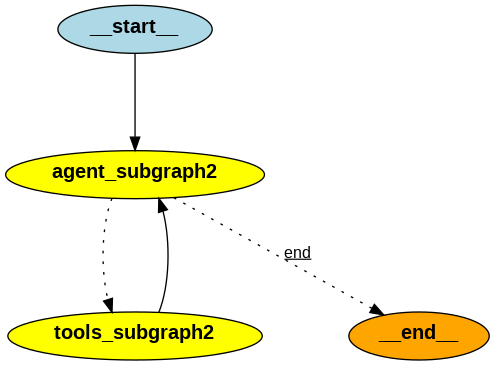

In [26]:
from IPython.display import Image

# Assuming `graph.get_graph()` provides a graph object and `.draw_png()` generates a PNG image
# Visualize the graph in a Jupyter notebook
Image(graph2.get_graph().draw_png())

In [34]:
# Helper function for formatting the output stream
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

# Example state for Subgraph 2 (PO Invoice for Processing)
state_subgraph2 = {
    "messages": [
        ("user", "Check invoice status in Imagenow for INV-0003 and process if required.")
    ]
}

# Execute the subgraph (graph2) and stream the output
stream_result = graph2.stream(state_subgraph2, stream_mode="values")

# Print the streamed output
print_stream(stream_result)



================================ Human Message =================================

Check invoice status in Imagenow for INV-0003 and process if required.
================================== Ai Message ==================================
Tool Calls:
  imagenow_tool_subgraph2 (call_5kqLuTxnrPy0NXE9FR7hASB2)
 Call ID: call_5kqLuTxnrPy0NXE9FR7hASB2
  Args:
    invoice_id: INV-0003
================================= Tool Message =================================
Name: imagenow_tool_subgraph2

{"status": "Present", "queue": "Nil"}
================================== Ai Message ==================================

The invoice INV-0003 is present in Imagenow and it is not in any queue currently. No further action is required at this moment.


### **Parent Graph**

In [78]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage

# Define the categorize_email function
def categorize_email(state: dict):
    # Use LLM to categorize the email based on the content (state['category'])
    model = ChatOpenAI(model="gpt-4", temperature=0)

    system_prompt = SystemMessage(content="Classify the email into one of the categories: 'Past Due Enquiry', 'PO Invoice for Processing'.")
    messages = [system_prompt, state["category"]]  # Assuming state["category"] contains the email content

    result = model.invoke(messages)  # LLM response classifying the email

    state["category"] = result.content  # Set the category in the state
    return state

# Example input state
state_input = {
    "category": "Check the payment status of invoice INV-0003. PO number is 77649657916"
}

# Execute the function
result = categorize_email(state_input)

# Print the output
print("Categorized Email: ", result["category"])


Categorized Email:  'Past Due Enquiry'


In [82]:
from langgraph.graph import StateGraph, END
from typing import TypedDict
from langchain_core.messages import SystemMessage
from langchain_openai import ChatOpenAI



# Categorization function using LLM to classify the email
def categorize_email(state: ParentState):
    # Use LLM to categorize the email based on the content (state['category'])
    model = ChatOpenAI(model="gpt-4", temperature=0)

    system_prompt = SystemMessage(content="Classify the email into one of the categories: 'Past Due Enquiry', 'PO Invoice for Processing'.")
    messages = [system_prompt, state["category"]]  # Assuming state["category"] contains the email content

    result = model.invoke(messages)  # LLM response classifying the email

    state["category"] = result.content.strip()  # Set the category in the state
    return state

# Conditional function to route the workflow based on email category
def categorize_decision(state: ParentState):
    # Check the category that was set by the LLM
    if state["category"] == "Past Due Enquiry":
        return "graph1"  # Route to graph1 (Past Due Enquiry)
    elif state["category"] == "PO Invoice for Processing":
        return "graph2"  # Route to graph2 (PO Invoice for Processing)
    else:
        return END  # End the workflow if the category is not recognized




In [83]:
# Parent Graph Initialization
parent_builder = StateGraph(ParentState)

# Add nodes for categorization and subgraphs
parent_builder.add_node("categorize_email", categorize_email)
parent_builder.add_node("graph1", graph1)  # Add compiled graph1 (Past Due Enquiry) as a node
parent_builder.add_node("graph2", graph2)  # Add compiled graph2 (PO Invoice for Processing) as a node

# Set entry point for the parent graph
parent_builder.set_entry_point("categorize_email")

# Add conditional edges to route based on email category
parent_builder.add_conditional_edges("categorize_email", categorize_decision, {
    "graph1": "graph1",  # If categorized as "Past Due Enquiry", route to graph1
    "graph2": "graph2",  # If categorized as "PO Invoice for Processing", route to graph2
    END: END  # End if no valid category
})

# Compile the parent graph
parent_graph = parent_builder.compile()

# Example input to test the parent graph
state_input = {
    "category": "Check the payment status of invoice INV-0003. PO number is 77649657916",
    "invoice_id": "INV-0003",
    "po_number": "77649657916"
}

# Execute the parent graph
result = parent_graph.invoke(state_input)
print(result)


{'messages': [], 'category': "'Past Due Enquiry'", 'invoice_id': 'INV-0003', 'po_number': '77649657916'}


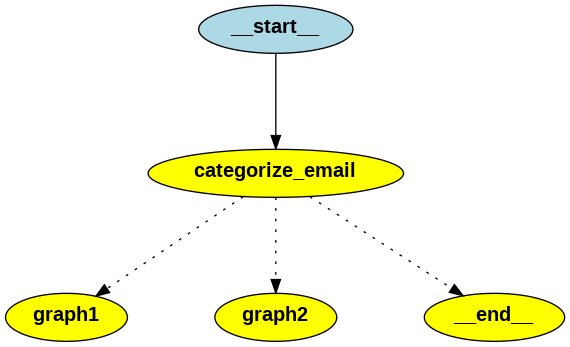

In [49]:
from IPython.display import Image

# Assuming `graph.get_graph()` provides a graph object and `.draw_png()` generates a PNG image
# Visualize the graph in a Jupyter notebook
Image(parent_graph.get_graph().draw_png())

In [70]:
print("State being passed to graph1:", state)


State being passed to graph1: {'messages': [('user', 'Please check the payment status of INV-0001. The PO number is 47687632524.')]}


In [81]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

# Parent state, which will handle both graph 1 and graph 2
class ParentState(TypedDict):
    """The state for the parent graph, which will handle both graph 1 and graph 2."""
    messages: Annotated[Sequence[BaseMessage], add_messages]  # Reducer for messages
    category: str  # Email category (e.g., 'Past Due Enquiry', 'PO Invoice for Processing')
    invoice_id: str
    po_number: str


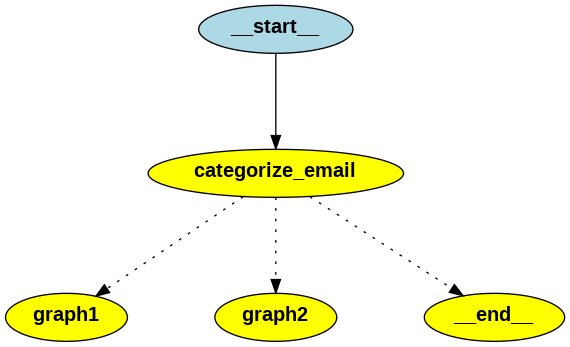

In [74]:
from IPython.display import Image

# Assuming `graph.get_graph()` provides a graph object and `.draw_png()` generates a PNG image
# Visualize the graph in a Jupyter notebook
Image(parent_graph.get_graph().draw_png())

In [76]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage

# Initialize the model and bind the tools for parent graph
model = ChatOpenAI(model="gpt-4", temperature=0).bind_tools(tools)

# Categorization function using LLM to classify the email
def categorize_email(state: ParentState):
    # Use LLM to categorize the email based on the content (state['category'])
    system_prompt = SystemMessage(content="Classify the email into one of the categories: 'Past Due Enquiry', 'PO Invoice for Processing'.")
    messages = [system_prompt, state["category"]]  # state["category"] is the email content

    result = model.invoke(messages)  # LLM response classifying the email
    print(f"LLM Response: {result.content}")  # Debugging output

    state["category"] = result.content  # Set the category in the state
    return state

# Conditional function to route the workflow based on email category
def categorize_decision(state: ParentState):
    print(f"Category Decision: {state['category']}")  # Debugging output
    if state["category"] == "Past Due Enquiry":
        return "graph1"  # Route to graph1 (Past Due Enquiry)
    elif state["category"] == "PO Invoice for Processing":
        return "graph2"  # Route to graph2 (PO Invoice for Processing)
    else:
        return END  # End the workflow if the category is not recognized

# Parent Graph Initialization
parent_builder = StateGraph(ParentState)

# Add nodes for categorization and subgraphs
parent_builder.add_node("categorize_email", categorize_email)
parent_builder.add_node("graph1", graph1)  # Add compiled graph1 (Past Due Enquiry) as a node
parent_builder.add_node("graph2", graph2)  # Add compiled graph2 (PO Invoice for Processing) as a node

# Set entry point for the parent graph
parent_builder.set_entry_point("categorize_email")

# Add conditional edges to route based on email category
parent_builder.add_conditional_edges("categorize_email", categorize_decision, {
    "graph1": "graph1",  # If categorized as "Past Due Enquiry", route to graph1
    "graph2": "graph2",  # If categorized as "PO Invoice for Processing", route to graph2
    END: END  # End if no valid category
})

# Compile the parent graph
parent_graph = parent_builder.compile()

# Example input to test the parent graph
state_input = {
    "category": "Check the payment status of invoice INV-0003. PO number is 77649657916",
    "invoice_id": "INV-0003",
    "po_number": "77649657916"
}

# Execute the parent graph
result = parent_graph.invoke(state_input)
print(result)


LLM Response: 
Category Decision: 
{'messages': [], 'category': '', 'invoice_id': 'INV-0003', 'po_number': '77649657916'}


In [77]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage

# Initialize the model and bind the tools for parent graph
model = ChatOpenAI(model="gpt-4", temperature=0).bind_tools(tools)

# Categorization function using LLM to classify the email
def categorize_email(state: ParentState):
    # Assuming the category should be the email content itself (rather than an empty field)
    email_content = state["category"]  # Email content should be passed for categorization

    # Use LLM to categorize the email based on the content (email content here)
    system_prompt = SystemMessage(content="Classify the email into one of the categories: 'Past Due Enquiry', 'PO Invoice for Processing'.")
    messages = [system_prompt, email_content]  # Pass the actual email content for classification

    result = model.invoke(messages)  # LLM response classifying the email
    print(f"LLM Response: {result.content}")  # Debugging output

    state["category"] = result.content.strip()  # Ensure category is set properly
    return state

# Conditional function to route the workflow based on email category
def categorize_decision(state: ParentState):
    print(f"Category Decision: {state['category']}")  # Debugging output
    if state["category"] == "Past Due Enquiry":
        return "graph1"  # Route to graph1 (Past Due Enquiry)
    elif state["category"] == "PO Invoice for Processing":
        return "graph2"  # Route to graph2 (PO Invoice for Processing)
    else:
        return END  # End the workflow if the category is not recognized

# Parent Graph Initialization
parent_builder = StateGraph(ParentState)

# Add nodes for categorization and subgraphs
parent_builder.add_node("categorize_email", categorize_email)
parent_builder.add_node("graph1", graph1)  # Add compiled graph1 (Past Due Enquiry) as a node
parent_builder.add_node("graph2", graph2)  # Add compiled graph2 (PO Invoice for Processing) as a node

# Set entry point for the parent graph
parent_builder.set_entry_point("categorize_email")

# Add conditional edges to route based on email category
parent_builder.add_conditional_edges("categorize_email", categorize_decision, {
    "graph1": "graph1",  # If categorized as "Past Due Enquiry", route to graph1
    "graph2": "graph2",  # If categorized as "PO Invoice for Processing", route to graph2
    END: END  # End if no valid category
})

# Compile the parent graph
parent_graph = parent_builder.compile()

# Example input to test the parent graph
state_input = {
    "category": "Check the payment status of invoice INV-0003. PO number is 77649657916",  # This is the email content now
    "invoice_id": "INV-0003",
    "po_number": "77649657916"
}

# Execute the parent graph
result = parent_graph.invoke(state_input)
print(result)


LLM Response: 
Category Decision: 
{'messages': [], 'category': '', 'invoice_id': 'INV-0003', 'po_number': '77649657916'}
